# Predicting the product rating based on reviews

This python code takes the dataset as input which contains the product information including reviews in the form of CSV file. Here we are using nltk library to parse the reviews and finding their tf-itf values to perform modeling on them. We have used the following algorithm to train our model, to see the accuracy of each model on the datset-

1. Linear regression
2. PCA 
3. SVD
4. Random forest
5. Plotting bar chart (model-vs-rmse values)

Finally, we have concluded best prediction based on rmse values.

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [5]:
#loading the data

df=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()
df1=df[['reviews.text','reviews.rating']]

In [6]:
#removing the stopwords form the reviews' text

l=[]
for x in df1['reviews.text']:

    word_tokens = word_tokenize(x)

    filtered_words = [word for word in word_tokens if word not in stopwords.words('english')]
    
    l.append(" ".join(filtered_words))

In [7]:
df1['filter-rev']=pd.DataFrame(l)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
#findinf tf-idf values

vectorizer = TfidfVectorizer()
  
vectors = vectorizer.fit_transform(df1['filter-rev'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df= pd.DataFrame(denselist, columns=feature_names)

In [10]:
#Scaling the data 
df.shape
df.isnull().sum()

00              0
10              0
100             0
1000            0
1000s           0
105             0
1080            0
10th            0
10x             0
11              0
11yr            0
12              0
120             0
128             0
128gb           0
129             0
13              0
139             0
13th            0
14              0
149             0
15              0
150             0
15mins          0
16              0
16g             0
16gb            0
17              0
18              0
180             0
               ..
zinio           0
zippy           0
zone            0
zoo             0
zooms           0
äãis            0
äî              0
äîand           0
äîbadly         0
äîespecially    0
äò              0
äôd             0
äôll            0
äôm             0
äôre            0
äôs             0
äôt             0
äôve            0
äù              0
äùcrestron      0
äú              0
äúalexa         0
äúbest          0
äúdropping      0
äúdual    

In [11]:
df1['reviews.rating'].isnull().sum()

0

In [12]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

### Prediction by using Linear Regression

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X, df1['reviews.rating'], test_size=0.3)
model = LinearRegression().fit(X_train, y_train)
y_pred=model.predict(X_test)

In [14]:
# making assumptionon the preddiction of model to noramlie the values

for i in range(len(y_pred)):
    
    if y_pred[i]>5:
        y_pred[i]=5
    if y_pred[i]<1:
        y_pred[i]=1
    else:
        y_pred[i]=round(y_pred[i])

In [15]:
df_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_preds)

      Actual  Predicted
4934       5        5.0
1849       4        4.0
1963       4        5.0
4445       4        4.0
2196       5        5.0
210        5        5.0
4937       5        5.0
1170       5        5.0
784        5        1.0
4049       4        3.0
3095       4        5.0
4688       5        5.0
2652       5        4.0
3858       4        5.0
4289       5        5.0
118        5        1.0
2188       5        5.0
3231       5        1.0
3017       5        5.0
3097       3        1.0
4695       5        5.0
613        5        5.0
3901       4        1.0
1753       5        5.0
3274       5        5.0
435        5        1.0
3219       4        5.0
1039       5        5.0
4813       5        5.0
3659       5        5.0
...      ...        ...
760        5        1.0
2955       4        1.0
34         4        1.0
2441       5        1.0
2430       4        1.0
441        5        1.0
4550       5        3.0
736        4        1.0
903        4        5.0
1051       4    

In [18]:
#calculating the erros

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 1.26
Mean squared error: 4.02
Root mean squared error: 2.00


### Prediction by using PCA

In [19]:
pca=PCA(n_components = 300)
X_reduced=pca.fit_transform(scale(X))

In [20]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test= train_test_split(X_reduced, df1['reviews.rating'], test_size=0.3)

lr=LinearRegression()
model=lr.fit(pca_X_train, pca_y_train)

pca_y_pred=model.predict(pca_X_test)

# making assumption
for i in range(len(pca_y_pred)):
    
    if pca_y_pred[i]>5:
        pca_y_pred[i]=5
    if pca_y_pred[i]<1:
        pca_y_pred[i]=1
    else:
        pca_y_pred[i]=round(pca_y_pred[i])
        
pca_pred = pd.DataFrame({'Actual': pca_y_test, 'Predicted': pca_y_pred})



In [21]:
mae = mean_absolute_error(pca_y_test, pca_y_pred)
mse = mean_squared_error(pca_y_test, pca_y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.43
Mean squared error: 0.68
Root mean squared error: 0.82


###  Prediction by using SVD decomposition 

In [23]:
from sklearn.decomposition import PCA, TruncatedSVD
svd = TruncatedSVD(n_components = 300)
svd.fit(X)
svd_X = pca.transform(X)

In [25]:
svd_X_train, svd_X_test, svd_y_train, svd_y_test= train_test_split(svd_X, df1['reviews.rating'], test_size=0.3)

model = LinearRegression().fit(svd_X_train, svd_y_train)

svd_y_pred=model.predict(svd_X_test)

# making assumption
for i in range(len(svd_y_pred)):
    
    if svd_y_pred[i]>5:
        svd_y_pred[i]=5
    if svd_y_pred[i]<1:
        svd_y_pred[i]=1
    else:
        svd_y_pred[i]=round(svd_y_pred[i])
        
svd_pred = pd.DataFrame({'Actual': svd_y_test.squeeze(), 'Predicted': svd_y_pred.squeeze()})



In [26]:
mae = mean_absolute_error(svd_y_test, svd_y_pred)
mse = mean_squared_error(svd_y_test, svd_y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.41
Mean squared error: 0.63
Root mean squared error: 0.79


### Prediction by using Random forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train,y_train)
rand_y_pred = random_forest.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, rand_y_pred)
rmse = np.math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse)) 

Accuracy for Random Forest 65.87705243692812


In [37]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, rand_y_pred)),'.3f'))
print("\nRMSE:\n",rmse)


RMSE:
 0.659


## Conclusion

Based on rmse values, Random forest tend to offer best accuracy over the remaining three.

#### Algorithm   --     rmse values

1. Linear Regression: 2.00
2. PCA : 0.82
3. SVD :  0.79
4. Random-forest : 0.659

In [48]:
import matplotlib.pyplot as plt

models=['Linear Regression','PCA','SVD','Random-forest']
rmse_values=[2.00,0.82,0.79,0.659]

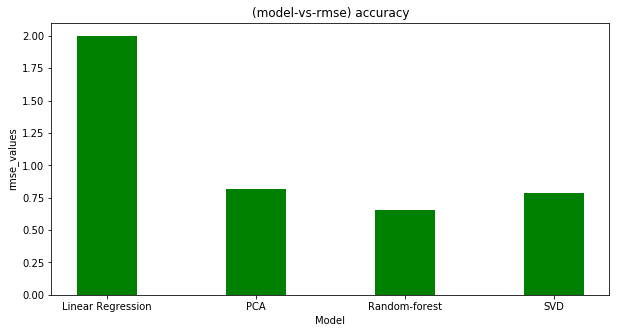

In [54]:
fig = plt.figure(figsize = (10, 5))
plt.bar(models, rmse_values, color ='green', width=0.4)
 
plt.xlabel("Model")
plt.ylabel("rmse_values")
plt.title("(model-vs-rmse) accuracy")
plt.show()